# Brief look at Cartopy

Cartopy is a Python package that provides easy creation of maps with matplotlib.

#### Cartopy *vs* Basemap

* Cartopy is replacing Basemap, which is [deprecated since 2020](https://matplotlib.org/basemap/users/intro.html#deprecation-notice). All new software development should try to use Cartopy whenever possible.
* Cartopy is better integrated with matplotlib and in a more active development state
* Proper handling of datelines in cartopy - one of the bugs in basemap (example: [Challenger circumnavigation](http://ocefpaf.github.io/python4oceanographers/blog/2013/09/23/cartopy/))
* Cartopy offers powerful vector data handling by integrating shapefile reading with Shapely capabilities
* Basemap: gridline labels for any projection; limited to a few in cartopy ([workaround](http://stackoverflow.com/questions/27962953/cartopy-axis-label-workaround) for Lambert Conic)
* Basemap has a map scale bar feature (can be [buggy](https://github.com/matplotlib/basemap/issues/165)); still [not implemented](https://github.com/SciTools/cartopy/issues/490) in cartopy, but there are some messy [workarounds](http://stackoverflow.com/questions/32333870/how-can-i-show-a-km-ruler-on-a-cartopy-matplotlib-plot)

As for the standard matplotlib plots, we first need to import `pyplot` submodule and make the graphical output appear in the notebook:

In order to create a map with cartopy and matplotlib, we typically need to import pyplot from matplotlib and cartopy's crs (coordinate reference system) submodule. These are typically imported as follows:

In [1]:
import matplotlib.pyplot as plt

Then let's import the cartopy

In [2]:
import cartopy

In addition, we import cartopy's **coordinate reference system** submodule:

In [3]:
import cartopy.crs as ccrs

In [4]:
import warnings
warnings.filterwarnings("ignore") # Python will warn you when cartopy downloads sample data for plotting. Here we supress those warnings

## Creating GeoAxes

* Cartopy-matplotlib interface is set up via the `projection` keyword when constructing `Axes` / `SubAxes`
* The resulting instance (`cartopy.mpl.geoaxes.GeoAxesSubplot`) has new methods specific to drawing cartographic data, e.g. **coastlines**:

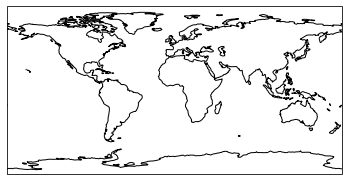

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

In [6]:
print('axes type:', type(ax))

axes type: <class 'cartopy.mpl.geoaxes.GeoAxesSubplot'>


Here we are using a Plate Carrée projection, which is one of *equidistant cylindrical projections*.

A full list of Cartopy projections is available at http://scitools.org.uk/cartopy/docs/latest/crs/projections.html.

### Putting georeferenced data on a map

* Use the standard matplotlib plotting routines with an additional `transform` keyword.
* The value of the `transform` argument should be the cartopy coordinate reference system *of the data being plotted*

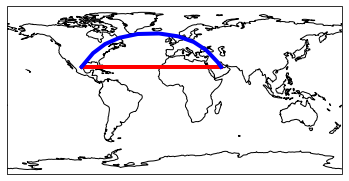

In [7]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
plt.plot([-100, 50], [25, 25], linewidth=4, color='r', transform=ccrs.PlateCarree())
plt.plot([-100, 50], [25, 25], linewidth=4, color='b', transform=ccrs.Geodetic())

Notice that unless we specify a map extent (we did so via the **``set_global``** method in this case) the map will zoom into the range of the plotted data.

### Decorating the map

We can add grid lines and tick labels to the map using the `gridlines()` method:

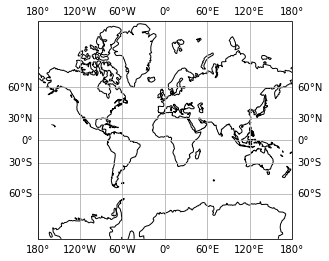

In [8]:
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()
gl = ax.gridlines(draw_labels=True)

Unfortunately, gridline labels work only in PlateCarree and Mercator projections.

We can control the specific tick values by using matplotlib's locator object, and the formatting can be controlled with matplotlib formatters:

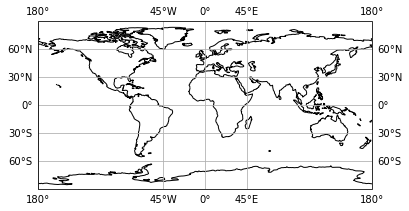

In [9]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LATITUDE_FORMATTER

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(draw_labels=True)

gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.yformatter = LATITUDE_FORMATTER

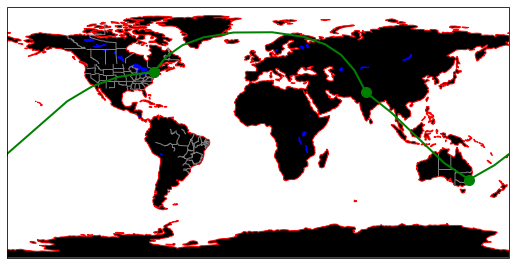

In [10]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.set_global()

lons = -75, 77.2, 151.2, -75
lats = 43, 28.6, -33.9, 43


ax.plot(lons, lats,
        color='green', linewidth=2, marker='o', ms=10,
        transform=ccrs.Geodetic())

# feature = cartopy.feature.LAND
feature = cartopy.feature.NaturalEarthFeature(name='land', category='physical',
                                              scale='110m',
                                              edgecolor='red', facecolor='black')
ax.add_feature(feature)
_ = ax.add_feature(cartopy.feature.LAKES, facecolor='b')
states = cartopy.feature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                                             name='admin_1_states_provinces_lines')
_ = ax.add_feature(states, edgecolor='gray')

# A worked example with GEBCO 2019 bathymetry

Loading some extra modules for data input and manipulation and updating default parameters to increase font sizes

In [11]:
import xarray as xr
import numpy as np
import pandas as pd
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER
from cartopy.io import shapereader

plt.rcParams.update({'font.size': 20})
SMALL_SIZE = 22
MEDIUM_SIZE = 22
LARGE_SIZE = 26
plt.rc('font', size=SMALL_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)

A cell to find the path to the bathymetry data on your system

In [12]:
from pathlib import Path # A module for dealing with paths that is operating system agnostic
notebook_dir = Path.cwd() # Get the current working directory
base_dir = notebook_dir.parent.absolute() # Get the parent directory (folder that contains out working directory)
data_dir = base_dir / 'data'# Get diretory where the data is stored

### Note on bathymetry data
To save space and time I have subset the bathymetry plotted in this example. If you wish to map a different area you will need to download the GEBCO topography data found [here](https://www.gebco.net/data_and_products/gridded_bathymetry_data) then uncomment and run the code block below for whatever are you desire. I suggest doing this once only as it takes some time! After running this your bathymetry selection will replace the example bathy in the file `data/bathy.nc`

In [ ]:
#from netCDF4 import Dataset
## A function to find the nearest item to a given point. Very handy with coordinates
#def argnearest(items,pivot):
#    near_item=min(items, key=lambda x: abs(x - pivot))
#    for i in range(len(items)): 
#        if items[i]==near_item:
#            return i
## Enter the coordinates of your desired box here [lon,lat] -180<lon<180
#SW_vertex = [-42,-60]
#NE_vertex = [-23,-50]
 
#gebco = Dataset("/path/to/your/GEBCO/folder/GEBCO_2014_2D.nc", "r", format="NETCDF4")
#all_lat = gebco['lat'][:]
#all_lon = gebco['lon'][:]

#SW_indices = [argnearest(all_lon,SW_vertex[0]),argnearest(all_lat,SW_vertex[1])]
#NE_indices = [argnearest(all_lon,NE_vertex[0]),argnearest(all_lat,NE_vertex[1])]

#bathy_lon = all_lon[SW_indices[0]:NE_indices[0]+1]
#bathy_lat = all_lat[SW_indices[1]:NE_indices[1]+1]

#bath_lat_selec = gebco['elevation'][np.logical_and(all_lat>=bathy_lat[0],all_lat<=bathy_lat[-1])][:]
#bathy_h = bath_lat_selec[:,np.logical_and(all_lon>=bathy_lon[0],all_lon<=bathy_lon[-1])]

In [ ]:
## To save our bathymetry data
#xlon = xr.IndexVariable(dims="longitude", data=bathy_lon, attrs={"units": "degrees_east"})
#xlat = xr.IndexVariable(dims="latitude", data=bathy_lat, attrs={"units": "degrees_north"})

#bathy_arr = xr.DataArray(
#    bathy_h,
#    name="bathymetry",
#    attrs={"units": "metres"},
#    dims=("latitude", "longitude"),
#    coords={"longitude": xlon, "latitude": xlat},
#)
#bathy_arr.to_netcdf(data_dir/'bathy.nc')

Load the stored bathymetry data

In [13]:
bathy_ds = xr.open_dataset(data_dir/'bathy.nc')
bathy_lon, bathy_lat, bathy_h = bathy_ds.bathymetry.longitude, bathy_ds.bathymetry.latitude, bathy_ds.bathymetry.values

We're just interested in bathy here, so set any height values greater than 0 to to 0 and set contour levels to plot later

In [14]:
bathy_h[bathy_h>0] = 0
bathy_conts = np.arange(-9000,500,500)

Here we load some scatter data from a two column csv for plotting later

In [15]:
# Load some scatter data of smaple locations near South Georgia
data = pd.read_csv('../data/scatter_coords.csv')
lons = data.Longitude.values
lats = data.Latitude.values

# Subset of sampling locations
sample_lon = lons[[0,2,7]]
sample_lat = lats[[0,2,7]]


Now to make the map itself. First we define our coordinate system, create figure and axes instances and set the plotting extent in degrees [West, East, South, North]

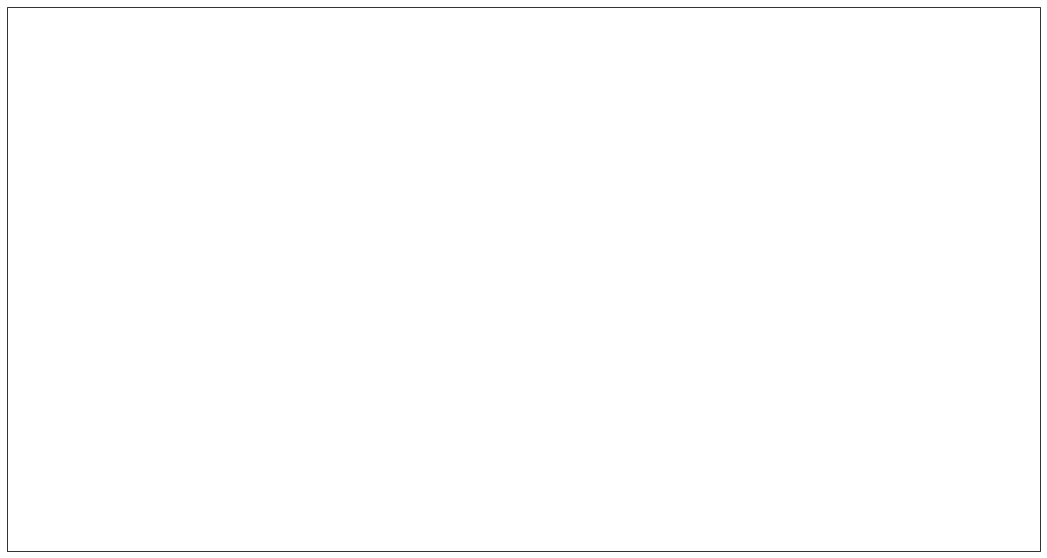

In [16]:
coord=ccrs.PlateCarree()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection=coord)
ax.set_extent([-42, -23, -60, -50], crs=coord)

Now we contour the bathymetry data

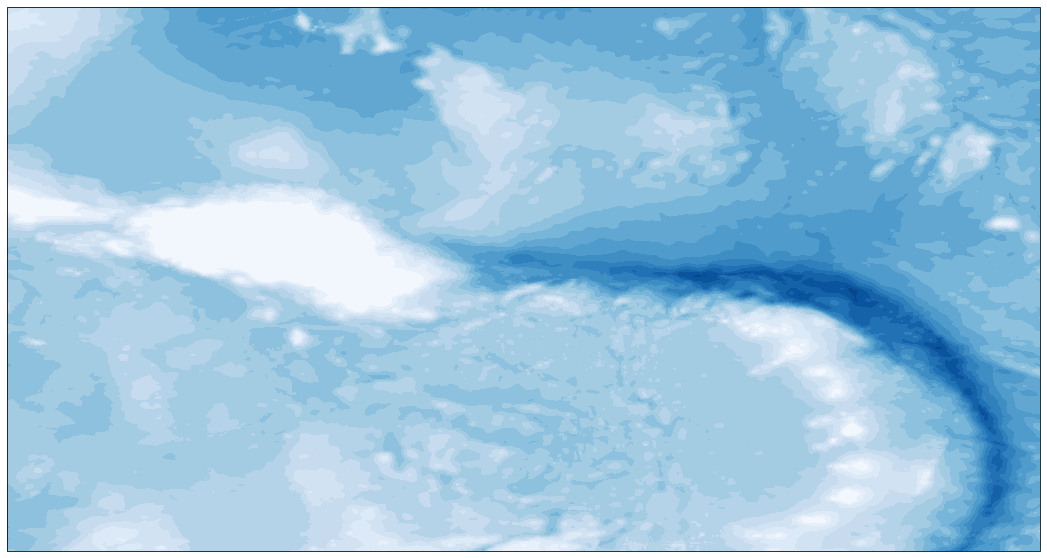

In [17]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection=coord)
ax.set_extent([-42, -23, -60, -50], crs=coord)
bathy=ax.contourf(bathy_lon,bathy_lat,bathy_h,bathy_conts,transform=coord,cmap='Blues_r')

A good start. To make it more map like we add gridlines, formatted labels and a colorbar

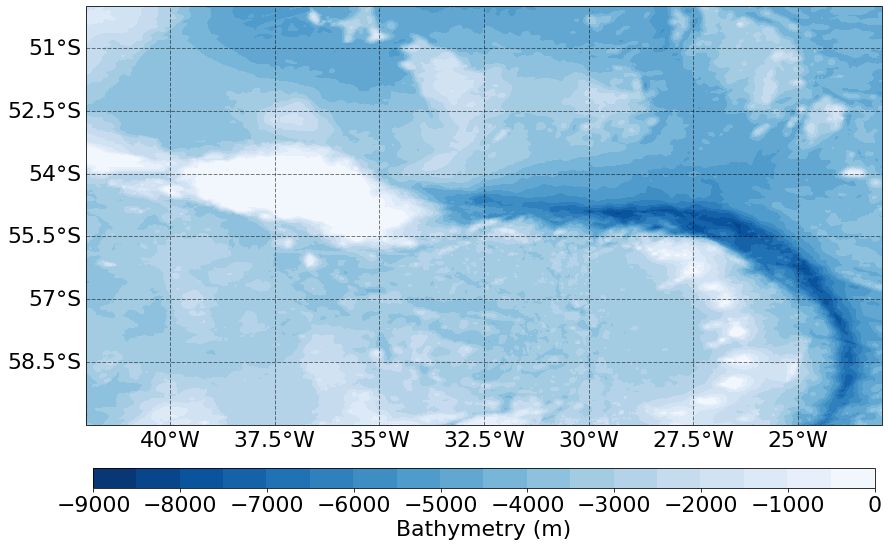

In [18]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection=coord)
ax.set_extent([-42, -23, -60, -50], crs=coord)
bathy=ax.contourf(bathy_lon,bathy_lat,bathy_h,bathy_conts,transform=coord,cmap='Blues_r')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = True
gl.xlines = True
fig.colorbar(bathy,ax=ax,orientation='horizontal',label='Bathymetry (m)',shrink=0.7,pad=0.08,aspect=40);

Now to add a few more features. First coastlines from cartopy's natural features toolbox. Then scatters of the samples we imported earlier

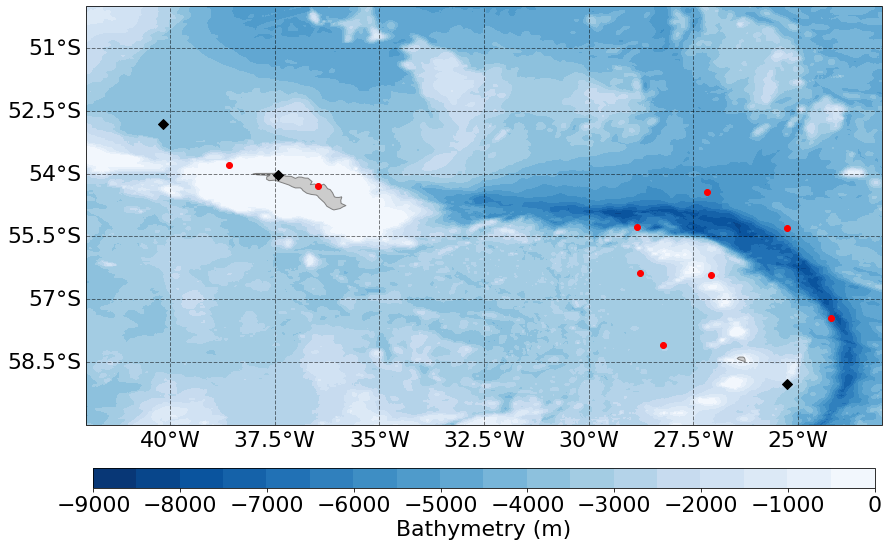

In [19]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection=coord)
ax.set_extent([-42, -23, -60, -50], crs=coord)
bathy=ax.contourf(bathy_lon,bathy_lat,bathy_h,bathy_conts,transform=coord,cmap='Blues_r')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = True
gl.xlines = True
fig.colorbar(bathy,ax=ax,orientation='horizontal',label='Bathymetry (m)',shrink=0.7,pad=0.08,aspect=40)


feature = cartopy.feature.NaturalEarthFeature(name='coastline',
                                              category='physical',
                                              scale='50m',
                                              edgecolor='0.5',
                                              facecolor='0.8')
ax.add_feature(feature)
ax.scatter(lons,lats,zorder=5,color='red',label='Samples collected')
ax.scatter(sample_lon,sample_lat,zorder=10,color='k',marker='D',s=50,label='Samples sequenced');

To finish off the map we add a legend for the scatter plot, an inset map showing the area at a larger scale and some text identifying the islands

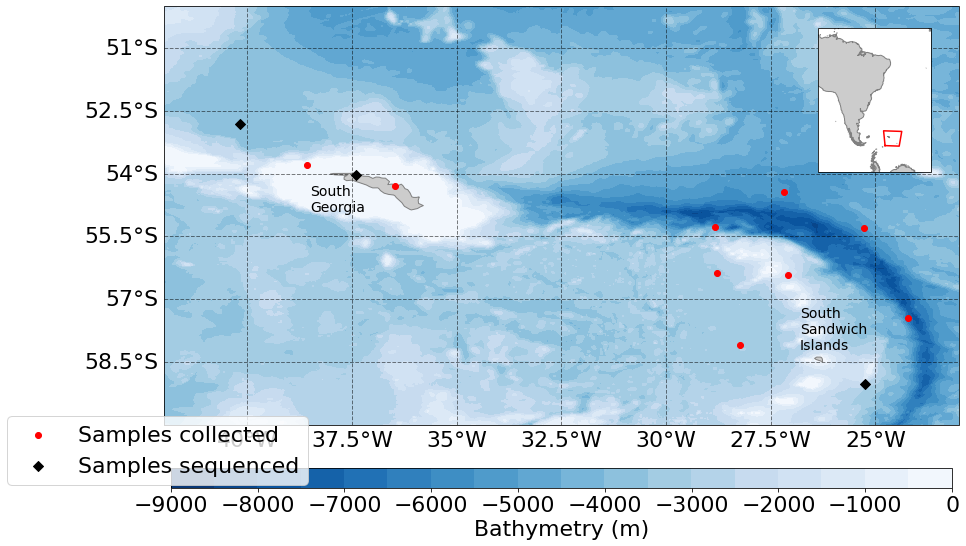

In [20]:
# Initiate the figure and axes, specifying the projection.
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection=coord)

# Set the extent of the map [W,E,S,N]
ax.set_extent([-42, -23, -60, -50], crs=coord)

# Plot the bathymetry here, could change the contour levels by making a new bathy_conts
# or try a different colormap
bathy=ax.contourf(bathy_lon,bathy_lat,bathy_h,bathy_conts,transform=coord,cmap='Blues_r')

# Set the color and style of the gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k', alpha=0.5, linestyle='--')

# Format those gridlines, turn off labels on the top and right side
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylines = True
gl.xlines = True

# Add a colorbar for the bathymetry data
fig.colorbar(bathy,ax=ax,orientation='horizontal',label='Bathymetry (m)',shrink=0.7,pad=0.08,aspect=40)

# Add the coastlines
ax.add_feature(feature)

# Add the scatter data, we could change the symbols
ax.scatter(lons,lats,zorder=5,color='red',label='Samples collected')
ax.scatter(sample_lon,sample_lat,zorder=10,color='k',marker='D',s=50,label='Samples sequenced')

# Add the legend, try changing its position
fig .legend( bbox_to_anchor=(0.12,0.2),loc='lower left')

# Here we add the inset map sub axes in the top right, note the different projection
tr2=ccrs.Stereographic(central_latitude=-55,central_longitude=-35)
sub_ax = plt.axes([0.63, 0.65, 0.2, 0.2], projection=ccrs.Stereographic(central_latitude=-55,central_longitude=-35))

# Try changing the extent of our inset map here
sub_ax.set_extent([-70, -15, -75, 10])

# Here we make a line that plots the vertices of our main plot to put on the inset map
x_co = [-42,-42,-23,-23,-42]
y_co = [-60,-50,-50,-60,-60]
sub_ax.add_feature(feature)
sub_ax.plot(x_co,y_co,transform=coord,zorder=10,color='red')

# Finally we add a couple of text labels for the islands
ax.text(-38.5,-54.9,'South\nGeorgia',fontsize=14)
ax.text(-26.8,-58.2,'South\nSandwich\nIslands',fontsize=14);